In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv', encoding='latin-1', names=['sent','text'])
data.head()

,sent,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
data['text'][2983]

"It 's not ."

# 데이터 개수

In [4]:
print('전체 학습데이터의 개수: {}'.format(len(data)))

전체 학습데이터의 개수: 4846


# 각 리뷰의 문자 길이 분포

In [5]:
data_length = data['text'].apply(len)

In [6]:
data_length.head()

0    127
1    190
2    228
3    206
4    203
Name: text, dtype: int64

Text(0, 0.5, 'Number of review')

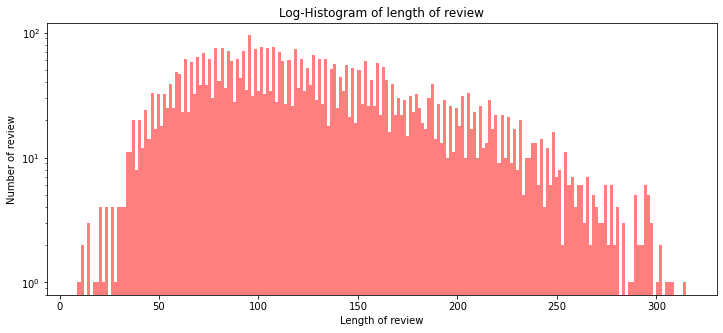

In [7]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(data_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

0~300으로 다양하게 분포

In [8]:
print('길이 최대 값: {}'.format(np.max(data_length)))
print('길이 최소 값: {}'.format(np.min(data_length)))
print('길이 평균 값: {:.2f}'.format(np.mean(data_length)))
print('길이 표준편차: {:.2f}'.format(np.std(data_length)))
print('길이 중간 값: {}'.format(np.median(data_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('길이 제 1 사분위: {}'.format(np.percentile(data_length, 25)))
print('길이 제 3 사분위: {}'.format(np.percentile(data_length, 75)))

길이 최대 값: 315
길이 최소 값: 9
길이 평균 값: 128.13
길이 표준편차: 56.52
길이 중간 값: 119.0
길이 제 1 사분위: 84.0
길이 제 3 사분위: 163.0


{'whiskers': [<matplotlib.lines.Line2D at 0x210cedc2978>,
 'caps': [<matplotlib.lines.Line2D at 0x210cedc80b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x210cedc2668>],
 'medians': [<matplotlib.lines.Line2D at 0x210cedc87b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x210cedc8e80>],
 'means': [<matplotlib.lines.Line2D at 0x210cedc8b38>]}

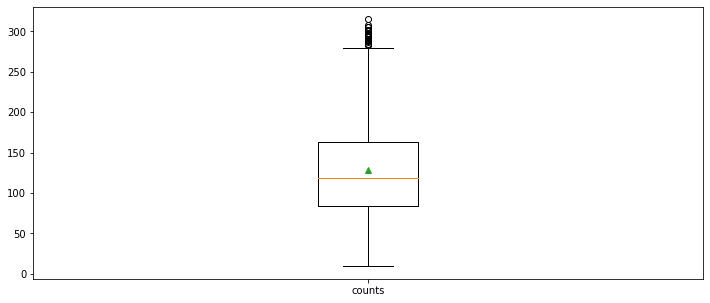

In [9]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(data_length,
             labels=['counts'],
             showmeans=True)

# 많이 사용된 단어

(-0.5, 799.5, 599.5, -0.5)

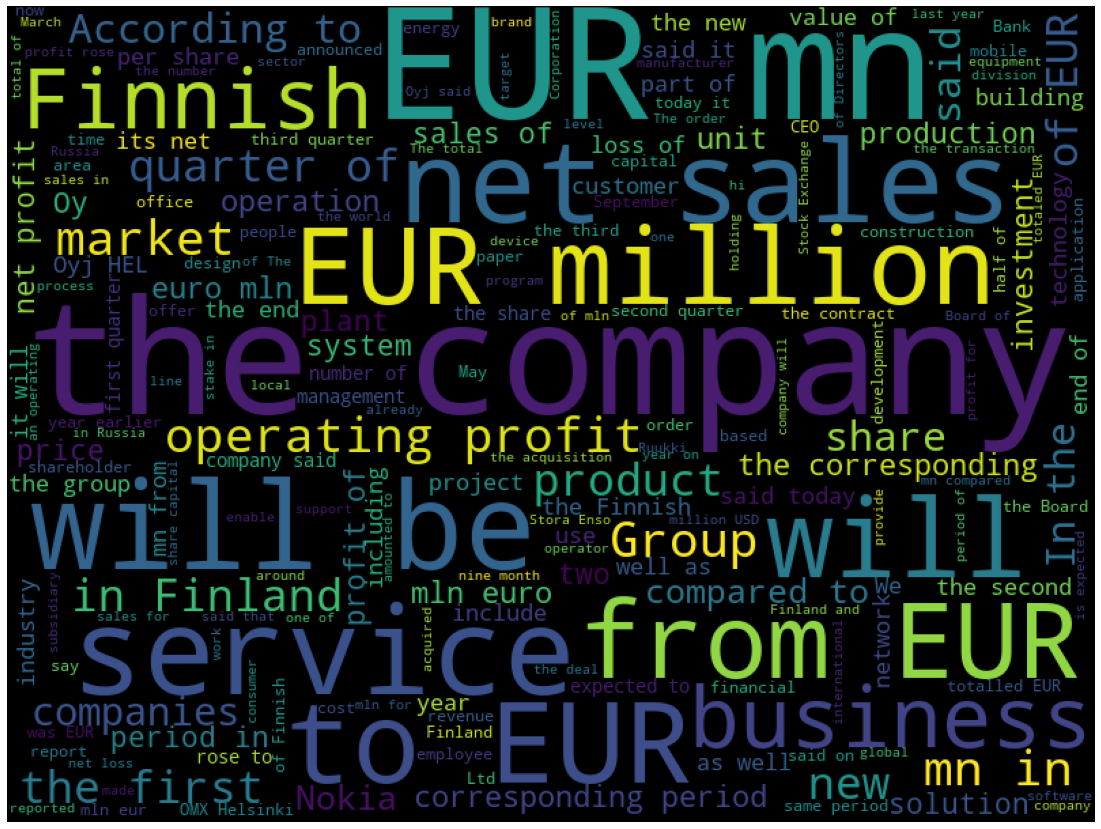

In [10]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(data['text']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# 데이터 분포

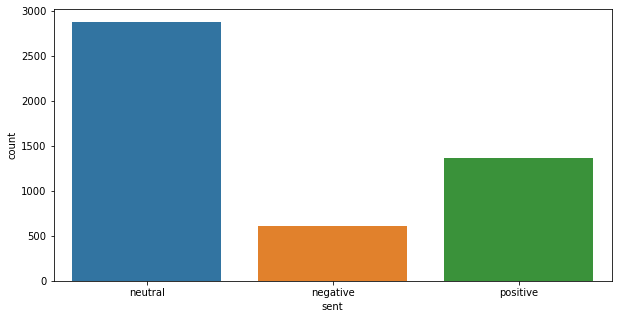

In [44]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(10, 5)
sns.countplot(data['sent'])

In [12]:
print("중립 개수: {}".format(data['sent'].value_counts()[0]))
print("긍정 개수: {}".format(data['sent'].value_counts()[1]))
print("부정 개수: {}".format(data['sent'].value_counts()[2]))

중립 개수: 2879
긍정 개수: 1363
부정 개수: 604


# 각 리뷰의 단어 개수 분포

In [13]:
train_word_counts = data['text'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

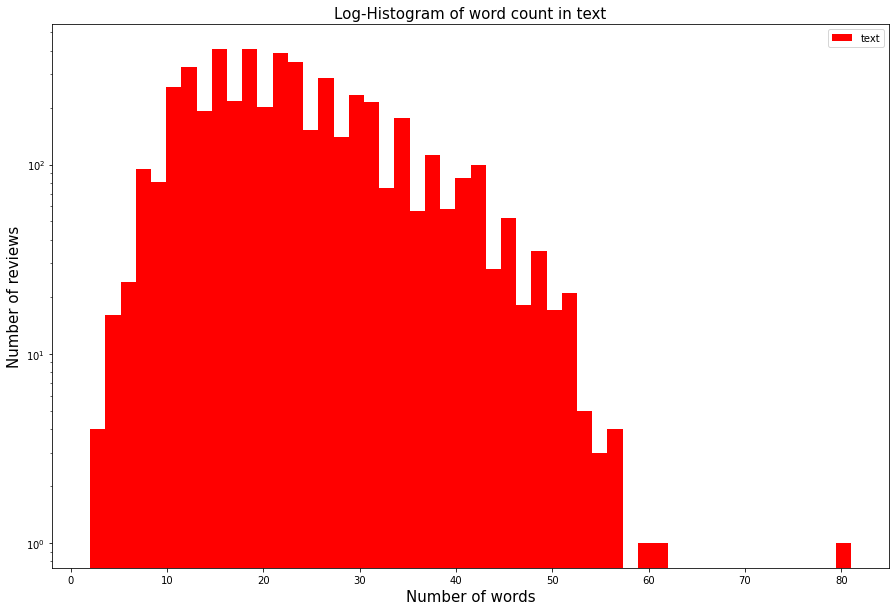

In [14]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='text')
plt.title('Log-Histogram of word count in text', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [15]:
print('단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

단어 개수 최대 값: 81
단어 개수 최소 값: 2
단어 개수 평균 값: 23.11
단어 개수 표준편차: 9.96
단어 개수 중간 값: 21.0
단어 개수 제 1 사분위: 16.0
단어 개수 제 3 사분위: 29.0


# 특수문자 및 대, 소문자 비율

In [16]:
qmarks = np.mean(data['text'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(data['text'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(data['text'].apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(data['text'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(data['text'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표: {:.2f}%'.format(qmarks * 100))
print('마침표: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자: {:.2f}%'.format(capital_first * 100))
print('대문자: {:.2f}%'.format(capitals * 100))
print('숫자: {:.2f}%'.format(numbers * 100))

물음표: 0.17%
마침표: 99.46%
첫 글자가 대문자: 92.88%
대문자: 99.83%
숫자: 53.32%


- 특수문자 제거
- 대문자 => 소문자 바꾸기

In [17]:
import re
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

c:\users\wjdwn\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\wjdwn\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\wjdwn\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\wjdwn\anaconda3\envs\tensorflow\lib\site-packages

In [18]:
print(data['text'][0])
d=data['text'][0]

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .


In [19]:
d = re.sub("[^a-zA-Z]", " ", d ) # 영어 문자를 제외한 나머지는 모두 공백으로 바꾼다.

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wjdwn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop_words = set(stopwords.words('english')) # 영어 불용어들의 set을 만든다.

d = d.lower()
words = d.split() # 소문자 변환 후 단어마다 나눠서 단어 리스트로 만든다.
words = [w for w in words if not w in stop_words] # 불용어 제거한 리스트를 만든다

In [22]:
print(words)

['according', 'gran', 'company', 'plans', 'move', 'production', 'russia', 'although', 'company', 'growing']


In [23]:
clean_review = ' '.join(words) # 단어 리스트들을 다시 하나의 글로 합친다.
print(clean_review)

according gran company plans move production russia although company growing


In [24]:
def preprocessing(text, remove_stopwords = False ): 

    #1. 영어가 아닌 특수문자들을 공백(" ")으로 바꾸기
    text = re.sub("[^a-zA-Z]", " ", text)

    #2. 대문자들을 소문자로 바꾸고 공백단위로 텍스트들 나눠서 리스트로 만든다.
    words = text.lower().split()

    if remove_stopwords: 
        #3. 불용어들을 제거
        #영어에 관련된 불용어 불러오기
        stops = set(stopwords.words("english"))
        # 불용어가 아닌 단어들로 이루어진 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        # 4. 단어 리스트를 공백을 넣어서 하나의 글로 합친다.
        clean= ' '.join(words)

    else: # 불용어 제거하지 않을 때
        clean = ' '.join(words)

    return clean

In [25]:
clean = []
for d in data['text']:
    clean.append(preprocessing(d, remove_stopwords = True))

# 전처리한 데이터 출력
clean[10]

'teliasonera tlsn said offer line strategy increase ownership core business holdings would strengthen eesti telekom offering customers'

In [26]:
clean

['according gran company plans move production russia although company growing',
 'technopolis plans develop stages area less square meters order host companies working computer technologies telecommunications statement said',
 'international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported',
 'new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability',
 'according company updated strategy years basware targets long term net sales growth range operating profit margin net sales',
 'financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs',
 'last quarter componenta net sales doubled eur eur period year earlier moved zero pre tax profit pre tax loss eur',
 'third quarter net sales i

In [27]:
clean_df = pd.DataFrame({'text': clean, 'sentiment': data['sent']})

In [28]:
clean_df

,text,sentiment
0,according gran company plans move production r...,neutral
1,technopolis plans develop stages area less squ...,neutral
2,international electronic industry company elco...,negative
3,new production plant company would increase ca...,positive
4,according company updated strategy years baswa...,positive
...,...,...
4841,london marketwatch share prices ended lower lo...,negative
4842,rinkuskiai beer sales fell per cent million li...,neutral
4843,operating profit fell eur mn eur mn including ...,negative
4844,net sales paper segment decreased eur mn secon...,negative


In [29]:
clean_df['text'][2983]

''

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean)
text_sequences = tokenizer.texts_to_sequences(clean)

In [46]:
print(text_sequences[0])

[44, 3135, 2, 229, 524, 39, 84, 2485, 2, 609]


In [33]:
word_vocab = tokenizer.word_index
print(word_vocab)

{'eur': 1, 'company': 2, 'mn': 3, 'said': 4, 'finnish': 5, 'sales': 6, 'million': 7, 'net': 8, 'profit': 9, 'year': 10, 'finland': 11, 'group': 12, 'operating': 13, 'mln': 14, 'new': 15, 'business': 16, 'period': 17, 'quarter': 18, 'oyj': 19, 'share': 20, 'market': 21, 'also': 22, 'services': 23, 'shares': 24, 'first': 25, 'euro': 26, 'helsinki': 27, 'loss': 28, 'compared': 29, 'today': 30, 'operations': 31, 'contract': 32, 'nokia': 33, 'mobile': 34, 'total': 35, 'per': 36, 'financial': 37, 'based': 38, 'production': 39, 'products': 40, 'corporation': 41, 'percent': 42, 'bank': 43, 'according': 44, 'companies': 45, 'technology': 46, 'hel': 47, 'corresponding': 48, 'plant': 49, 'v': 50, 'service': 51, 'solutions': 52, 'construction': 53, 'one': 54, 'increased': 55, 'capital': 56, 'well': 57, 'agreement': 58, 'investment': 59, 'increase': 60, 'customers': 61, 'rose': 62, 'value': 63, 'pct': 64, 'order': 65, 'oy': 66, 'stock': 67, 'end': 68, 'january': 69, 'second': 70, 'two': 71, 'would'

In [34]:
print("전체 단어 개수: ", len(word_vocab) + 1)

전체 단어 개수:  8952


In [35]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [36]:
MAX_SEQUENCE_LENGTH = 21

inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of data: ', inputs.shape)

Shape of data:  (4846, 21)


In [37]:
labels = np.array(data['sent'])
print('Shape of label tensor:', labels.shape)

Shape of label tensor: (4846,)


In [38]:
for i in range(len(labels)):
    if labels[i]=='neutral':
        labels[i]=1
    elif labels[i]=='negative':
        labels[i]=0
    elif labels[i]=='positive':
        labels[i]=2

In [39]:
labels

array([1, 1, 0, ..., 0, 0, 0], dtype=object)

In [40]:
data_configs

{'vocab': {'eur': 1,
  'company': 2,
  'mn': 3,
  'said': 4,
  'finnish': 5,
  'sales': 6,
  'million': 7,
  'net': 8,
  'profit': 9,
  'year': 10,
  'finland': 11,
  'group': 12,
  'operating': 13,
  'mln': 14,
  'new': 15,
  'business': 16,
  'period': 17,
  'quarter': 18,
  'oyj': 19,
  'share': 20,
  'market': 21,
  'also': 22,
  'services': 23,
  'shares': 24,
  'first': 25,
  'euro': 26,
  'helsinki': 27,
  'loss': 28,
  'compared': 29,
  'today': 30,
  'operations': 31,
  'contract': 32,
  'nokia': 33,
  'mobile': 34,
  'total': 35,
  'per': 36,
  'financial': 37,
  'based': 38,
  'production': 39,
  'products': 40,
  'corporation': 41,
  'percent': 42,
  'bank': 43,
  'according': 44,
  'companies': 45,
  'technology': 46,
  'hel': 47,
  'corresponding': 48,
  'plant': 49,
  'v': 50,
  'service': 51,
  'solutions': 52,
  'construction': 53,
  'one': 54,
  'increased': 55,
  'capital': 56,
  'well': 57,
  'agreement': 58,
  'investment': 59,
  'increase': 60,
  'customers': 61,


In [41]:
import json

In [42]:
# 전처리 된 데이터를 넘파이 형태로 저장
np.save('data_input.npy', inputs)
np.save('data_label.npy', labels)

# 정제된 텍스트를 csv 형태로 저장
clean_df.to_csv('data_clean.csv', index = False)


# 데이터 사전을 json 형태로 저장
json.dump(data_configs,open('data_configs.json','w'), ensure_ascii=False)

In [43]:
inputs

array([[  44, 3135,    2, ...,    0,    0,    0],
       [ 692,  229,  724, ...,    0,    0,    0],
       [ 192,  525,   79, ...,  725, 4479,  156],
       ...,
       [  13,    9,  149, ...,    0,    0,    0],
       [ 592,   92,    1, ...,    3,    1,    3],
       [   6,   11,   92, ...,    0,    0,    0]])